Fig.1c-f.See Fig.1b for GPS data download. Siemsicity catalogue and InSAR dispalcement timeseries for a selected point are on the github page

In [24]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import datetime
import pandas as pd
import matplotlib.dates as mdates
import time
from datetime import datetime as dt

Functions to read GPS data from file and reference it to 'MKEA' station

In [25]:
def read_ref_data(time1,time2):
    filename='../GPS_data/'+'MKEA.txt'
    dfin = pd.read_csv(filename, header=0, delimiter=r"\s+")
    index = ['Time', 'East', 'North', 'Up']
    dataval=pd.DataFrame(index=index);dataerr=pd.DataFrame(index=index);
    dataval=pd.concat([dfin['YYMMMDD'].rename('date'), (dfin['_e0(m)']+dfin['__east(m)']).rename('east'), (dfin['____n0(m)']+dfin['_north(m)']).rename('north'), 
                       (dfin['u0(m)']+dfin['____up(m)']).rename('up'),dfin['yyyy.yyyy'].rename('dateval')], axis=1)
    dataerr=pd.concat([dfin['YYMMMDD'].rename('date'), dfin['sig_e(m)'], dfin['sig_n(m)'], dfin['sig_u(m)']], axis=1,ignore_index=False)
    dataval['date']=pd.to_datetime(dataval['date'], format='%y%b%d', errors='ignore')
    dataerr['date']=pd.to_datetime(dataval['date'], format='%y%b%d', errors='ignore')
    mask= (dataval['date'] > time1) & (dataval['date'] < time2)
    dataval=dataval[mask];dataerr=dataerr[mask];
    dataval=dataval.set_index(['date'])
    dataval=dataval.resample('D').interpolate(method='linear')
    dataval=dataval.reset_index()
    return dataval

def read_data(sitename,time1,time2):
    filename='../GPS_data/'+sitename+'.txt'
    dfin = pd.read_csv(filename, header=0, delimiter=r"\s+")
    index = ['Time', 'East', 'North', 'Up']
    dataval=pd.DataFrame(index=index);dataerr=pd.DataFrame(index=index);
    dataval=pd.concat([dfin['YYMMMDD'].rename('date'), (dfin['_e0(m)']+dfin['__east(m)']).rename('east'), (dfin['____n0(m)']+dfin['_north(m)']).rename('north'), 
                       (dfin['u0(m)']+dfin['____up(m)']).rename('up'),dfin['yyyy.yyyy'].rename('dateval')], axis=1)
    dataerr=pd.concat([dfin['YYMMMDD'].rename('date'), dfin['sig_e(m)'], dfin['sig_n(m)'], dfin['sig_u(m)']], axis=1,ignore_index=False)
    dataval['date']=pd.to_datetime(dataval['date'], format='%y%b%d', errors='ignore')
    dataerr['date']=pd.to_datetime(dataval['date'], format='%y%b%d', errors='ignore')
    mask= (dataval['date'] > time1) & (dataval['date'] < time2)
    dataval=dataval[mask];dataerr=dataerr[mask];
    #reference to MKEA
    dataval2=read_ref_data(time1,time2)
    merged=pd.merge(dataval,dataval2,how='inner',on=['date'])
    merged['east']=merged['east_x']-merged['east_y'];
    merged['north']=merged['north_x']-merged['north_y'];
    merged['up']=merged['up_x']-merged['up_y'];
    merged['dateval']=(merged['dateval_x']+merged['dateval_y'])*0.5
    merged=merged[['date','east','north','up','dateval']]
    return merged


In [26]:
years = mdates.YearLocator(1)   # every year
months = mdates.MonthLocator(interval=3)  # every month
yearsFmt = mdates.DateFormatter('%Y')

data = pd.read_csv('eq_catalogs/eq_summit_2011_2020.csv',header=0, parse_dates=['time'],index_col='time')
data2=data.resample('M')['mag'].count().to_frame()
data = pd.read_csv('eq_catalogs/eq_east_decollement_2011_2020.csv',header=0, parse_dates=['time'],index_col='time')
data3=data.resample('M')['mag'].count().to_frame()
data = pd.read_csv('eq_catalogs/eq_west_decollement_2011_2020.csv',header=0, parse_dates=['time'],index_col='time')
data4=data.resample('M')['mag'].count().to_frame()
InSAR_ts = pd.read_csv('y1494_x1673_ts.txt',skiprows=6,header=None,delimiter=r"\s+",
                   names=['date','disp'],parse_dates=['date'])
InSAR_ts['date'] = [pd.to_datetime(d) for d in InSAR_ts['date']];

Plot figure

/Users/bkv3/Documents/development/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
/Users/bkv3/Documents/development/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  # This is added back by InteractiveShellApp.init_path()


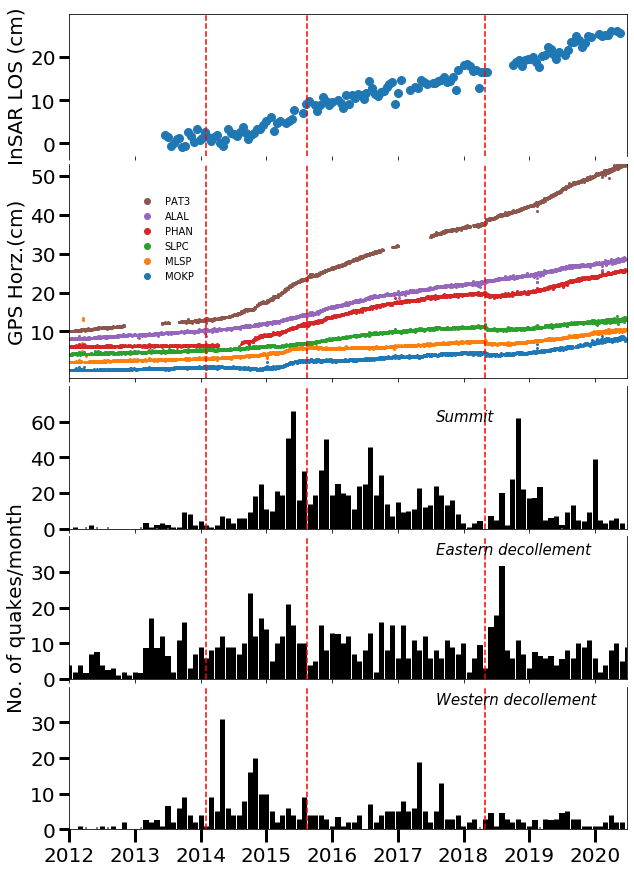

In [28]:
x=[datetime.date(2012, 1, 1), datetime.date(2020, 6, 30)]
y=[0,40];

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True,figsize=(10, 15), gridspec_kw = {'height_ratios':[1,1.5,1,1,1]});


#customize axes
fig.subplots_adjust(hspace=0.05)
ff=20;ffti=20;
for i in range(5):
    axes[i].tick_params(labelsize=ff);
    axes[i].tick_params(axis='y',length=10, width=3);axes[i].tick_params(axis='y',length=10, width=3);
    axes[i].tick_params(which='minor',length=0, width=0);
    axes[i].xaxis.set_major_locator(years);
    axes[i].xaxis.set_major_formatter(yearsFmt) 
    if i>0:
        axes[i].spines['top'].set_color('none');
axes[0].spines['bottom'].set_color('none');    
axes[0].set_yticks([0,10,20]);axes[1].set_yticks([0,10,20,30]);
axes[4].set_xlim([x[0], x[-1]]);axes[4].set_yticks(np.arange(0, 80, 20));
axes[4].tick_params(axis='x',length=13, width=3);axes[4].tick_params(which='minor',length=7, width=2);

#plot InSAR timeseries data
axes[0].plot_date(InSAR_ts['date'],InSAR_ts['disp'],marker='o',label='InSAR',markersize=8.0);
axes[0].set_ylabel('InSAR LOS (cm)',fontsize=ffti)
axes[0].set_ylim([-3,30]);

#plot GPS timeseries
site_list=['MOKP','MLSP','SLPC','PHAN','ALAL','PAT3'];
time1=x[0];time2=x[1];t=0;
for site in site_list:
    gps_data=read_data(site,time1,time2);
    gps_data['up']=(gps_data['up']-gps_data['up'].iloc[0:10].mean())*100
    gps_data['north']=(gps_data['north']-gps_data['north'].iloc[0:10].mean())*100 #+t;t=t+15;
    gps_data['east']=(gps_data['east']-gps_data['east'].iloc[0:10].mean())*100 #+t; #t=t+15;
    gps_data['horz']=(gps_data['east']*gps_data['east']+gps_data['north']*gps_data['north'])**(0.5)+t; t=t+2;
    axes[1].plot_date(gps_data['date'],gps_data['horz'],marker='o',markersize=2.0,label=site);
axes[1].set_ylim([-2,53]);axes[1].set_yticks([10,20,30,40,50]);
axes[1].set_ylabel('GPS Horz.(cm)',fontsize=ffti);
lgnd=axes[1].legend(labelspacing=-2.5,fontsize=10,bbox_to_anchor=(0.31, 0.65), bbox_transform=plt.gcf().transFigure,frameon=False)
for handle in lgnd.legendHandles:
    handle._legmarker.set_markersize(6)

#Plot siesmicity rate
axes[2].bar(data2.index,data2.mag,color='black',edgecolor='k',linewidth=5);
axes[3].bar(data3.index,data3.mag,color='black',edgecolor='k',linewidth=5);
axes[4].bar(data4.index,data4.mag,color='black',edgecolor='k',linewidth=5);

axes[2].set_ylim([0, 80]);axes[2].set_yticks(np.arange(0, 80, 20));
axes[3].set_ylim([0, 40]);axes[3].set_yticks(np.arange(0, 40, 10));
axes[4].set_ylim([0, 40]);axes[4].set_yticks(np.arange(0, 40, 10));

axes[3].set_ylabel('No. of quakes/month',fontsize=ffti);

vlines=[datetime.date(2014, 1, 31),datetime.date(2015, 8, 15),datetime.date(2018, 5, 1)];
for i in range(len(vlines)):
    for j in range(5):
        axes[j].axvline(vlines[i],color='r',linestyle='--');
marker=datetime.date(2017, 8, 1);
axes[2].text(marker, 60, 'Summit', fontsize=15,style='italic');
axes[3].text(marker, 35, 'Eastern decollement', fontsize=15,style='italic');
axes[4].text(marker, 35, 'Western decollement', fontsize=15,style='italic');

#save plot
#plt.savefig('Fig.1c-f_displacement_over_SeismicityRates.pdf',dpi=300,bbox_inches='tight',transparent=True)
